In [1]:

import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2
from keras.layers import BatchNormalization
from keras import models, layers

from google.colab import drive
import pickle
from keras import backend as K
from tensorflow.keras.applications import ResNet50
from keras import Input

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator





In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split


features = np.load('/content/drive/MyDrive/Colab Notebooks/newdataset/features_downsampled.npy')
labels = np.load('/content/drive/MyDrive/Colab Notebooks/newdataset/labels_downsampled.npy')

features_train, features_test, target_train, target_test = train_test_split(features, labels, test_size=.30, random_state=42,stratify = labels)
features_train = np.moveaxis(features_train, 1, -1)
features_test = np.moveaxis(features_test, 1, -1)


# New Section

In [4]:
import tensorflow as tf
np.random.seed(0)

target_train= to_categorical(target_train)
target_test= to_categorical(target_test)

tf.keras.backend.clear_session()

### SEQUENTICAL MODEL OF **CNN** **

In [5]:
# Define a sequential model
model = models.Sequential()

# Add Input layer which takes the images of shape (512,512,1)
model.add(layers.Conv2D(64,(5,5),strides= (2,2), activation = 'relu',kernel_initializer= "glorot_uniform",
                                  input_shape = (512,512,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(64,(3,3),strides= (2,2), activation = 'relu',kernel_initializer= "glorot_uniform"))
model.add(layers.MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                        

In [6]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=["accuracy"])
history = model.fit(features_train, target_train, epochs=20, batch_size=64, validation_split=.1)



Epoch 1/20
16/16 [==============================] - 19s 372ms/step - loss: 8.0680 - accuracy: 0.5417 - val_loss: 17.8940 - val_accuracy: 0.2883
Epoch 2/20
16/16 [==============================] - 5s 281ms/step - loss: 0.9016 - accuracy: 0.6653 - val_loss: 2.7977 - val_accuracy: 0.4865
Epoch 3/20
16/16 [==============================] - 4s 280ms/step - loss: 0.8600 - accuracy: 0.6925 - val_loss: 2.1058 - val_accuracy: 0.5766
Epoch 4/20
16/16 [==============================] - 4s 278ms/step - loss: 0.5812 - accuracy: 0.7417 - val_loss: 0.7136 - val_accuracy: 0.7477
Epoch 5/20
16/16 [==============================] - 4s 278ms/step - loss: 0.4653 - accuracy: 0.7879 - val_loss: 5.3999 - val_accuracy: 0.6126
Epoch 6/20
16/16 [==============================] - 4s 276ms/step - loss: 0.8655 - accuracy: 0.7809 - val_loss: 0.5860 - val_accuracy: 0.8288
Epoch 7/20
16/16 [==============================] - 4s 276ms/step - loss: 0.3519 - accuracy: 0.8553 - val_loss: 3.5303 - val_accuracy: 0.6937
Epoc

In [7]:
loss, accuracy = model.evaluate(features_test, target_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

15/15 [==============================] - 1s 36ms/step - loss: 1.5036 - accuracy: 0.7785
Test Loss: 1.503594160079956
Test Accuracy: 0.7784810066223145


In [8]:
y_pred=model.predict(features_test)
y_pred

15/15 [==============================] - 0s 19ms/step


array([[1.5028213e-04, 9.9864811e-01, 1.2016151e-03, 3.2775020e-08],
       [0.0000000e+00, 1.8588197e-30, 5.1598488e-30, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       ...,
       [9.9999404e-01, 1.2259367e-10, 1.1227038e-07, 5.8857263e-06],
       [6.3896306e-13, 9.8880798e-01, 4.8214139e-07, 1.1191484e-02],
       [1.0783461e-14, 1.0000000e+00, 2.7983070e-15, 8.2660344e-17]],
      dtype=float32)

In [9]:
y_pred=np.argmax(y_pred,axis=1)


In [10]:
y_test=np.argmax(target_test,axis=1)

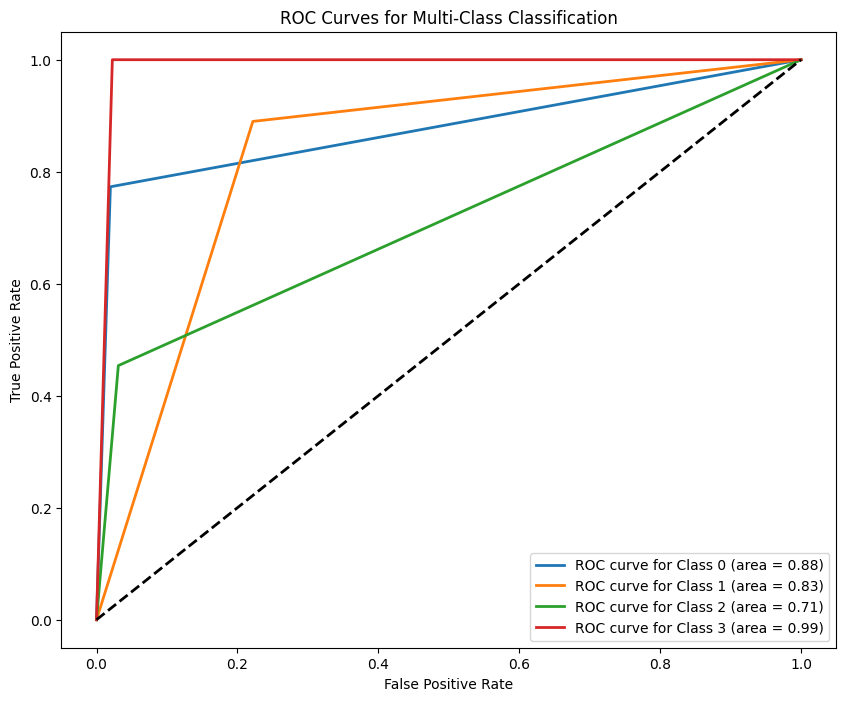

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

num_classes = 4
# Assuming you have 'target_test' and 'y_pred' as predicted class labels (not one-hot encoded)

# Convert predicted class labels to one-hot encoded format
y_pred_one_hot = label_binarize(y_pred, classes=np.arange(num_classes))

# Calculate the ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
num_classes = y_test_binary.shape[1]

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(target_test[:, i], y_pred_one_hot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve for Class %d (area = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()


              precision    recall  f1-score   support

           0       0.87      0.83      0.85       119
           1       0.75      0.81      0.78       118
           2       0.82      0.71      0.76       119
           3       0.92      1.00      0.96       118

    accuracy                           0.84       474
   macro avg       0.84      0.84      0.84       474
weighted avg       0.84      0.84      0.84       474



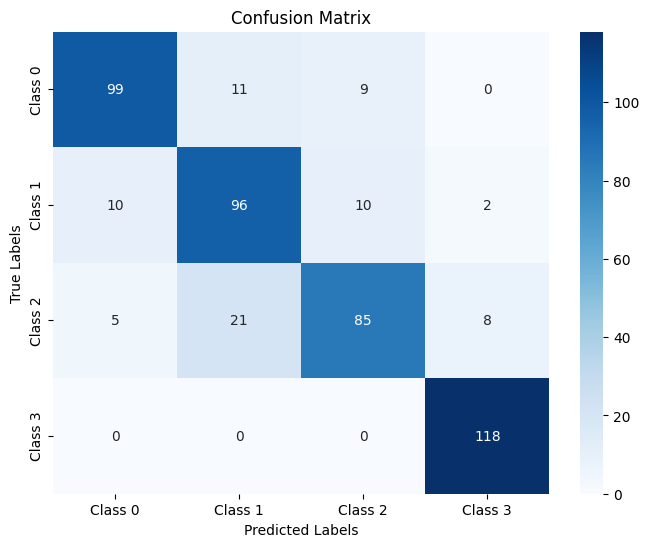

In [11]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
report2 =classification_report(y_test,y_pred)
print(report2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


DATA ARGUMENTION

In [13]:

datagen = ImageDataGenerator(rotation_range=90,horizontal_flip=True,vertical_flip=True)
datagen.fit(features_train)


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,       # Randomly rotate images in the range (0-20 degrees)
    width_shift_range=0.2,   # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # Randomly shift images vertically (fraction of total height)
    horizontal_flip=True,    # Randomly flip images horizontally
    vertical_flip=True       # Randomly flip images vertically
)

# Fit the ImageDataGenerator on the training data
datagen.fit(features_train)

# Create a new augmented training dataset
augmented_features_train = []
augmented_target_train = []

# Generate augmented samples and add them to the new dataset
for x_batch, y_batch in datagen.flow(features_train, target_train, batch_size=len(features_train), shuffle=True):
    augmented_features_train.extend(x_batch)
    augmented_target_train.extend(y_batch)
    break  # Stop after generating one epoch of augmented data

# Convert the augmented datasets to numpy arrays
augmented_features_train = np.array(augmented_features_train)
augmented_target_train = np.array(augmented_target_train)

# Shuffle the augmented data to avoid the original and augmented samples being in sequence
augmented_idx = np.random.permutation(len(augmented_features_train))
augmented_features_train = augmented_features_train[augmented_idx]
augmented_target_train = augmented_target_train[augmented_idx]

# Now, you can train the model using the augmented data
history = model.fit(augmented_features_train, augmented_target_train, epochs=20, batch_size=64, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(features_test, target_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/20
16/16 [==============================] - 5s 303ms/step - loss: 2.6824 - accuracy: 0.5437 - val_loss: 3.0835 - val_accuracy: 0.3784
Epoch 2/20
16/16 [==============================] - 5s 289ms/step - loss: 0.9284 - accuracy: 0.6251 - val_loss: 3.6363 - val_accuracy: 0.3964
Epoch 3/20
16/16 [==============================] - 5s 288ms/step - loss: 0.8558 - accuracy: 0.6915 - val_loss: 19.4553 - val_accuracy: 0.2342
Epoch 4/20
16/16 [==============================] - 5s 285ms/step - loss: 0.6317 - accuracy: 0.7397 - val_loss: 16.7477 - val_accuracy: 0.3243
Epoch 5/20
16/16 [==============================] - 5s 286ms/step - loss: 0.5562 - accuracy: 0.7588 - val_loss: 4.1573 - val_accuracy: 0.4324
Epoch 6/20
16/16 [==============================] - 5s 285ms/step - loss: 0.4882 - accuracy: 0.7930 - val_loss: 4.0404 - val_accuracy: 0.4054
Epoch 7/20
16/16 [==============================] - 5s 285ms/step - loss: 0.4105 - accuracy: 0.8241 - val_loss: 2.4117 - val_accuracy: 0.4234
Epoc

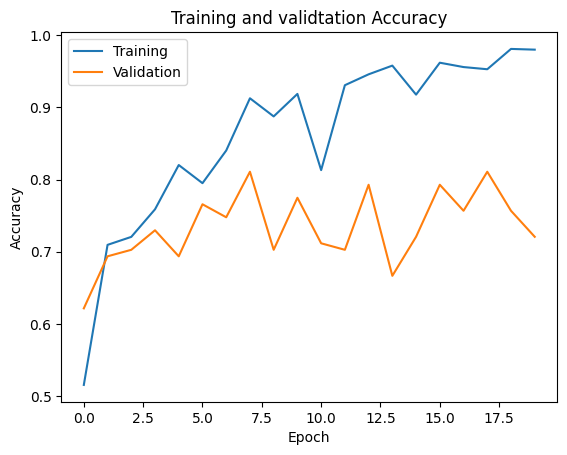

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validtation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])

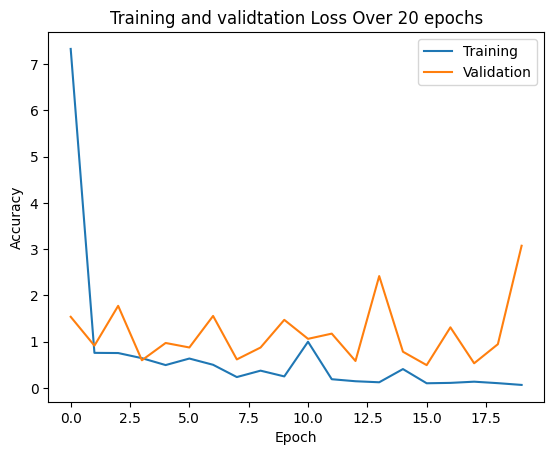

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validtation Loss Over 20 epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])


In [ ]:
pip install seaborn

RESNET50 Model

In [16]:

def grayscale_to_rgb(images, channel_axis=-1):
    #images= K.expand_dims(images, axis=channel_axis)
    tiling = [1] * 4    # 4 dimensions: B, H, W, C
    tiling[channel_axis] *= 3
    images= K.tile(images, tiling)
    return images

rgb_train = grayscale_to_rgb(features_train)
rgb_test = grayscale_to_rgb(features_test)
rgb_test.shape

TensorShape([474, 512, 512, 3])

In [17]:
in_shape = Input(shape = (512,512,3))
# load model

res_model = ResNet50(include_top=False,
                 input_tensor=in_shape,
                 weights = "imagenet")

for layer in res_model.layers[:143]:
  layer.trainable = False
# summarize the model
res_model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 518, 518, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 256, 256, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [18]:

from keras import models, layers
renet50_model = models.Sequential()
renet50_model.add(res_model)
renet50_model.add(layers.Flatten())
renet50_model.add(layers.Dense(4, activation='softmax'))
renet50_model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history_renet50 = renet50_model.fit(rgb_train, target_train, batch_size=32,epochs = 5,validation_data=(rgb_test,target_test))

Epoch 1/5
35/35 [==============================] - 49s 980ms/step - loss: 5.6780 - accuracy: 0.5995 - val_loss: 10089.2012 - val_accuracy: 0.2996
Epoch 2/5
35/35 [==============================] - 26s 751ms/step - loss: 1.3102 - accuracy: 0.8101 - val_loss: 5306.5254 - val_accuracy: 0.4051
Epoch 3/5
35/35 [==============================] - 27s 784ms/step - loss: 1.2575 - accuracy: 0.8590 - val_loss: 432.1537 - val_accuracy: 0.5907
Epoch 4/5
35/35 [==============================] - 27s 783ms/step - loss: 1.4436 - accuracy: 0.8770 - val_loss: 2316.5059 - val_accuracy: 0.5485
Epoch 5/5
35/35 [==============================] - 27s 771ms/step - loss: 1.6292 - accuracy: 0.9114 - val_loss: 2535.0657 - val_accuracy: 0.6139


15/15 [==============================] - 7s 459ms/step
              precision    recall  f1-score   support

           0       0.92      0.56      0.70       119
           1       0.88      0.30      0.44       118
           2       0.51      0.60      0.55       119
           3       0.53      1.00      0.69       118

    accuracy                           0.61       474
   macro avg       0.71      0.61      0.60       474
weighted avg       0.71      0.61      0.60       474



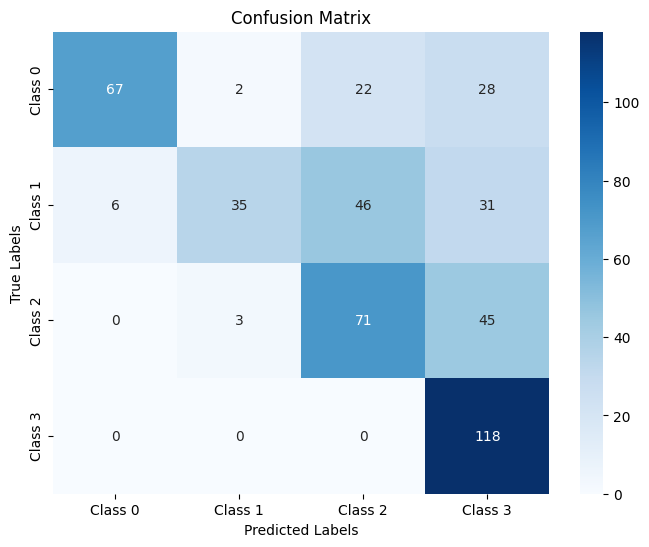

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
y_pred_prob = renet50_model.predict(rgb_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_test = np.argmax(target_test, axis=1)

report3 =classification_report(y_test,y_pred)
print(report3)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

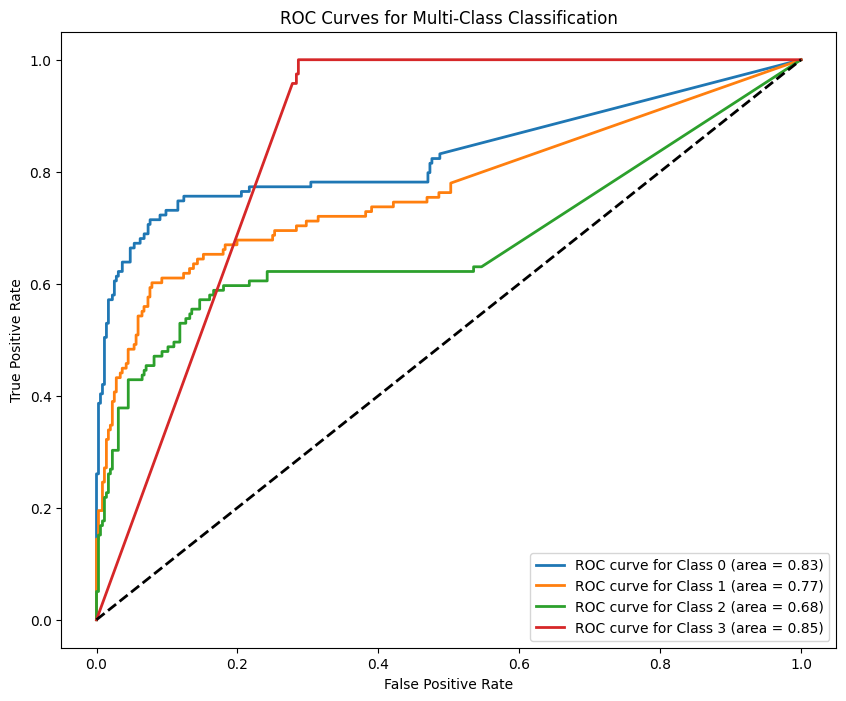

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert one-hot encoded target labels for y_test
y_test_binary = label_binarize(y_test, classes=np.arange(4))

# Calculate the ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
num_classes = y_test_binary.shape[1]

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve for Class %d (area = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()


In [ ]:
loss, accuracy = renet50_model.evaluate(rgb_test, target_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

15/15 [==============================] - 7s 439ms/step - loss: 262.5435 - accuracy: 0.6013
Test Loss: 262.54345703125
Test Accuracy: 0.6012658476829529


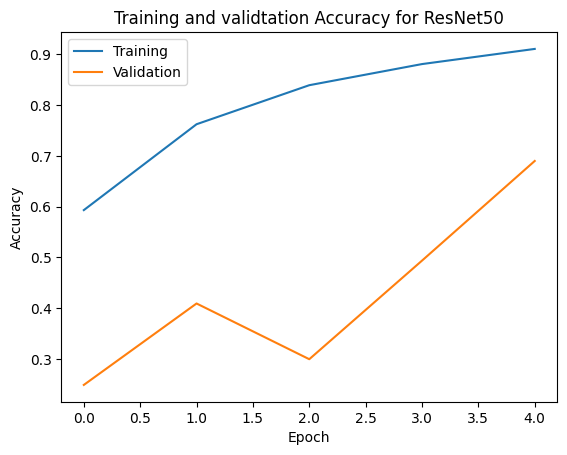

In [ ]:

plt.plot(history_renet50.history['accuracy'])
plt.plot(history_renet50.history['val_accuracy'])
plt.title('Training and validtation Accuracy for ResNet50')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])


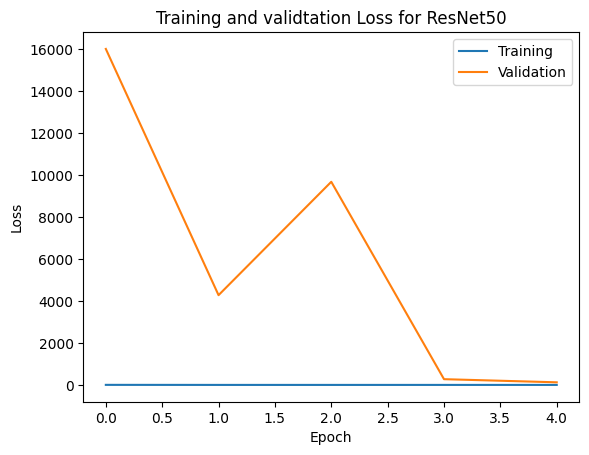

In [ ]:
plt.plot(history_renet50.history['loss'])
plt.plot(history_renet50.history['val_loss'])
plt.title('Training and validtation Loss for ResNet50')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])


In [21]:
features_train.shape

(1106, 512, 512, 1)

In [22]:
def resize_image(img):
  img = cv2.resize(img,(224,224))
  return img

In [23]:
fetures_resize = np.zeros((1106,224,224))
for i in range(1106):
  fetures_resize[i]= resize_image(features_train[i,:,:,0])

In [24]:
fetures_resize.shape

(1106, 224, 224)

VGG16

In [25]:
  from tensorflow.keras.applications.vgg16 import VGG16
  from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Lambda
  from tensorflow.keras.models import Model
  from tensorflow.keras.models import Model
  from tensorflow.keras.optimizers import Adam



  num_classes = 4
  # Assuming 'features_train' and 'features_test' are your input images (224x224x1)
  input_shape = (224, 224, 1)

  # Repeat the grayscale channel three times to simulate an RGB image
  def repeat_channels(x):
      return K.repeat_elements(x, 3, axis=-1)

  input_tensor = Input(shape=input_shape)
  rgb_tensor = Lambda(repeat_channels)(input_tensor)

  # Load the VGG16 base model
  base_model = VGG16(weights='imagenet', include_top=False, input_tensor=rgb_tensor)

  # Add your custom layers on top of the VGG16 base
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  x = Dense(1024, activation='relu')(x)
  predictions = Dense(num_classes, activation='softmax')(x)

  # Create the final model by combining the base model and custom layers
  VGG16model = Model(inputs=base_model.input, outputs=predictions)

  # Compile the model
  VGG16model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

  # Train the model on the training data
  history = VGG16model.fit(fetures_resize, target_train, batch_size=32, epochs=10, validation_split=.2 )




58889256/58889256 [==============================] - 0s 0us/step


Epoch 1/10
28/28 [==============================] - 42s 886ms/step - loss: 49.2222 - accuracy: 0.3348 - val_loss: 1.2291 - val_accuracy: 0.3694
Epoch 2/10
28/28 [==============================] - 12s 433ms/step - loss: 1.2394 - accuracy: 0.4695 - val_loss: 1.1222 - val_accuracy: 0.4099
Epoch 3/10
28/28 [==============================] - 12s 433ms/step - loss: 1.1015 - accuracy: 0.4785 - val_loss: 1.0948 - val_accuracy: 0.4550
Epoch 4/10
28/28 [==============================] - 12s 430ms/step - loss: 1.0632 - accuracy: 0.5147 - val_loss: 1.0001 - val_accuracy: 0.4910
Epoch 5/10
28/28 [==============================] - 12s 427ms/step - loss: 1.0397 - accuracy: 0.5000 - val_loss: 1.0023 - val_accuracy: 0.5315
Epoch 6/10
28/28 [==============================] - 12s 424ms/step - loss: 0.9962 - accuracy: 0.5305 - val_loss: 0.9615 - val_accuracy: 0.5405
Epoch 7/10
28/28 [==============================] - 12s 426ms/step - loss: 1.0037 - accuracy: 0.5362 - val_loss: 1.0158 - val_accuracy: 0.545

In [ ]:
 features_test.shape

(474, 512, 512, 1)

In [26]:
def resize_imagetest(img):
  img = cv2.resize(img,(224,224))
  #imgnew = np.zeros((224,224,3))
  #imgnew[:,:,0]= img
  #imgnew[:,:,1]= img
  #imgnew[:,:,2]= img
  return img
fetures_resizetest = np.zeros((474,224,224))
for i in range(474):
  fetures_resizetest[i]= resize_imagetest(features_test[i,:,:,0])



In [27]:
# Evaluate the model on the testing data
loss, accuracy = VGG16model.evaluate(fetures_resizetest, target_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

15/15 [==============================] - 6s 398ms/step - loss: 0.9961 - accuracy: 0.4979
Test Loss: 0.9960625767707825
Test Accuracy: 0.49789029359817505


15/15 [==============================] - 2s 126ms/step
              precision    recall  f1-score   support

           0       0.35      0.87      0.50       119
           1       0.00      0.00      0.00       118
           2       0.43      0.18      0.26       119
           3       0.87      0.93      0.90       118

    accuracy                           0.50       474
   macro avg       0.41      0.50      0.41       474
weighted avg       0.41      0.50      0.41       474



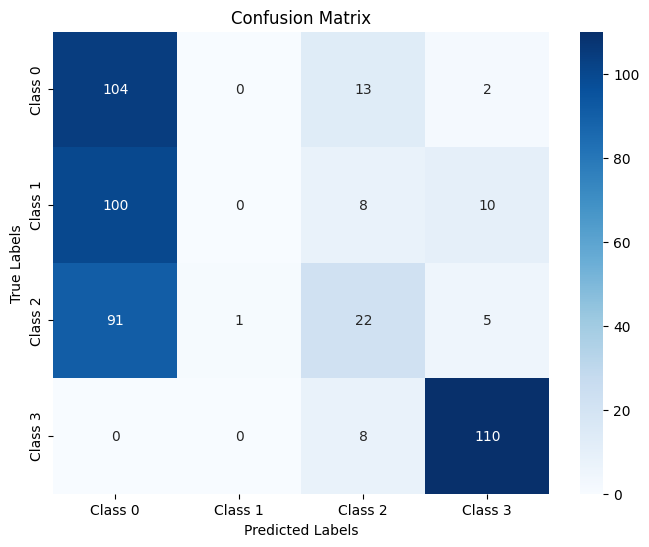

In [28]:

y_pred_prob = VGG16model.predict(fetures_resizetest)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_test = np.argmax(target_test, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
report2 =classification_report(y_test,y_pred)
print(report2)

# Plot the confusion matrix as a heatmap
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

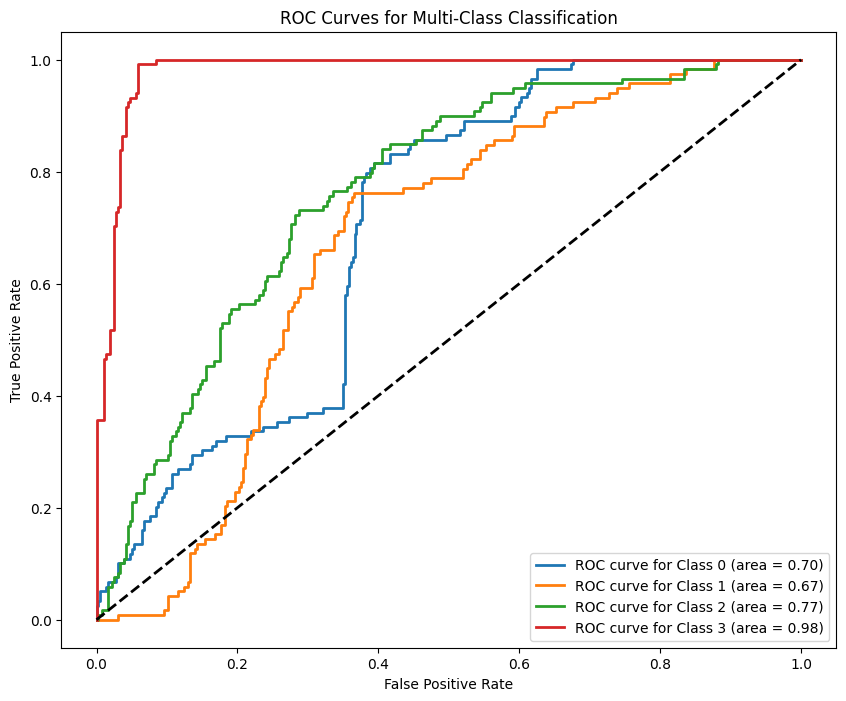

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert predicted probabilities to one-hot encoded format
y_test_binary = label_binarize(y_test, classes=np.arange(4))

# Calculate the ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
num_classes = y_test_binary.shape[1]

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve for Class %d (area = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#inception v3

INCEPTIONV3


In [30]:
def resize_images(img):
    img = cv2.resize(img, (224, 224))
    return img

fetures_resizes = np.zeros((1106, 224, 224))
for i in range(1106):
    fetures_resizes[i] = resize_images(features_train[i, :, :, 0])


In [31]:
import tensorflow as tf
tf.keras.backend.clear_session()


In [32]:
import numpy as np
import cv2
from keras.applications import InceptionV3
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard

# Assuming 'features_train' contains your feature data with shape (1106, 512, 512, 1)
# Assuming 'target_train' contains your target labels with shape (1106, num_classes)

num_classes = 4

# Define the resize function
def resize_imageinp(img):
    # Resize the image using OpenCV resize function
    return cv2.resize(img, (299, 299))

# Resize the 'features_train' array to match the input shape of InceptionV3
resized_features = np.zeros((1106, 299, 299,3))
for i in range(1106):
    resized_features[i, :, :, 0] = resize_imageinp(features_train[i, :, :, 0])

resized_features_test = np.zeros((len(features_test), 299, 299,3))
for i in range(len(features_test)):
    resized_features_test[i, :, :, 0] = resize_imageinp(features_test[i, :, :, 0])



# Load InceptionV3 model with pre-trained weights (excluding the top classification layer)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Add a global average pooling layer and a dense output layer for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
output_layer = Dense(num_classes, activation='softmax')(x)

# Create the new model with the desired output layer
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Set up TensorBoard callback for visualization
tensorboard = TensorBoard(log_dir='./logs', write_graph=True, write_images=True)

# Fit the model to the data



87910968/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                  

In [33]:
model.fit(resized_features, target_train,
          batch_size=32,
          epochs=20,
          validation_split=.1,
          callbacks=[tensorboard])

Epoch 1/20
32/32 [==============================] - 35s 651ms/step - loss: 0.7230 - accuracy: 0.6935 - val_loss: 1.6922 - val_accuracy: 0.4685
Epoch 2/20
32/32 [==============================] - 15s 459ms/step - loss: 0.2582 - accuracy: 0.9035 - val_loss: 1.4196 - val_accuracy: 0.6126
Epoch 3/20
32/32 [==============================] - 15s 458ms/step - loss: 0.1479 - accuracy: 0.9427 - val_loss: 0.4740 - val_accuracy: 0.7928
Epoch 4/20
32/32 [==============================] - 14s 452ms/step - loss: 0.1262 - accuracy: 0.9588 - val_loss: 0.8040 - val_accuracy: 0.7477
Epoch 5/20
32/32 [==============================] - 14s 447ms/step - loss: 0.1114 - accuracy: 0.9638 - val_loss: 0.6509 - val_accuracy: 0.7928
Epoch 6/20
32/32 [==============================] - 14s 446ms/step - loss: 0.0696 - accuracy: 0.9809 - val_loss: 0.5740 - val_accuracy: 0.8559
Epoch 7/20
32/32 [==============================] - 14s 450ms/step - loss: 0.0250 - accuracy: 0.9940 - val_loss: 0.4473 - val_accuracy: 0.8739

15/15 [==============================] - 6s 305ms/step
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       119
           1       0.79      0.62      0.70       118
           2       0.73      0.83      0.78       119
           3       0.86      1.00      0.92       118

    accuracy                           0.81       474
   macro avg       0.81      0.81      0.81       474
weighted avg       0.81      0.81      0.81       474



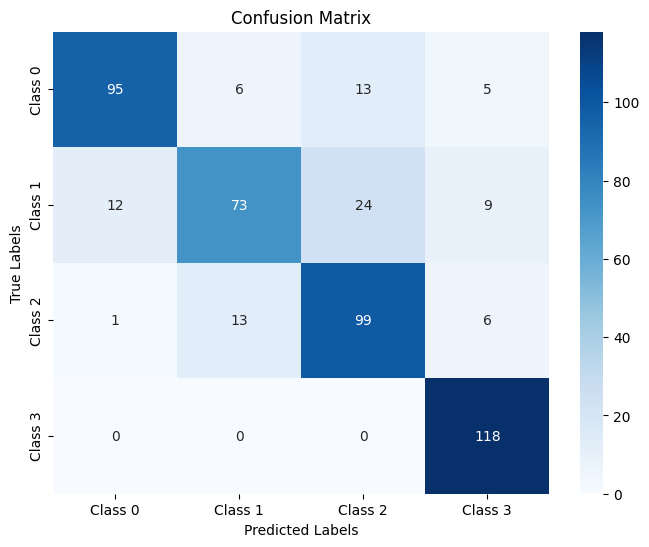

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
y_pred_prob = model.predict(resized_features_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_test = np.argmax(target_test, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
report =classification_report(y_test,y_pred)
print(report)
# Plot the confusion matrix as a heatmap
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

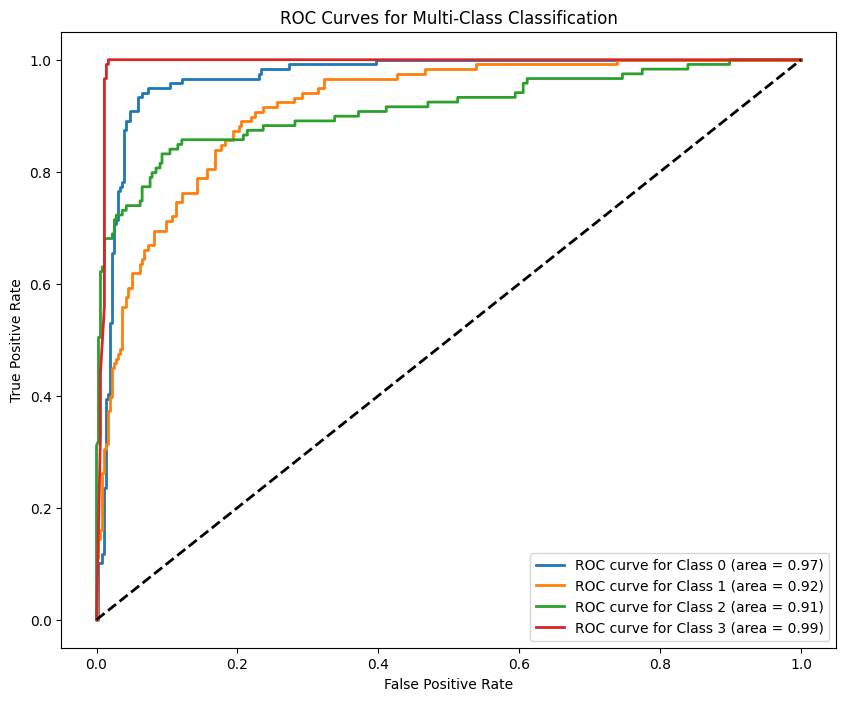

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming 'y_pred_prob' and 'target_test' contain predicted probabilities and true labels in one-hot encoded format

# Convert predicted probabilities to one-hot encoded format
y_test_binary = label_binarize(y_test, classes=np.arange(4))

# Calculate the ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
num_classes = y_test_binary.shape[1]

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve for Class %d (area = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()


In [ ]:
loss, accuracy = model.evaluate(resized_features_test, target_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

15/15 [==============================] - 4s 293ms/step - loss: 0.7337 - accuracy: 0.8734
Test Loss: 0.7336569428443909
Test Accuracy: 0.8734177350997925


In [37]:
resize_imageinp(features_train[0]).shape

(299, 299)

MOBILENET V2

In [39]:
def resize_images_mob(img):
    img = cv2.resize(img, (224, 224))
    return img

fetures_resized_mob = np.zeros((1106, 224, 224,3))
for i in range(1106):
    fetures_resized_mob[i,:,:,0] = resize_images_mob(features_train[i, :, :, 0])
    fetures_resized_mob[i,:,:,1] = resize_images_mob(features_train[i, :, :, 0])
    fetures_resized_mob[i,:,:,2] = resize_images_mob(features_train[i, :, :, 0])



fetures_resized_mobtest= np.zeros((len(features_test), 224, 224,3))
for i in range(len(features_test)):
    fetures_resized_mobtest[i,:,:,0] = resize_images_mob(features_test[i, :, :, 0])
    fetures_resized_mobtest[i,:,:,1] = resize_images_mob(features_test[i, :, :, 0])
    fetures_resized_mobtest[i,:,:,2] = resize_images_mob(features_test[i, :, :, 0])

In [40]:

from keras.models import Sequential
from keras.layers import Activation, GlobalAveragePooling2D,Dropout
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, EarlyStopping
import keras.optimizers
from sklearn.metrics import classification_report
import keras.optimizers
from keras.applications import mobilenet_v2
from keras.layers import Input
import numpy as np
from keras import Model

In [41]:

tensorboard = TensorBoard(log_dir='./MobileNet_v2', histogram_freq=0,
                          write_graph=True, write_images=False)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)




In [42]:

image_size = 224
IMG_SHAPE = (image_size, image_size, 3)
base_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)

9406464/9406464 [==============================] - 0s 0us/step


In [43]:

base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [44]:

CLASSES = 4
x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)


In [45]:
for layer in base_model.layers:
    layer.trainable = False

In [46]:
model.compile(loss='categorical_crossentropy',
              optimizer= "adam",
              metrics=['accuracy'],
              )

In [47]:
history = model.fit(fetures_resized_mob, target_train,
                    batch_size=32,
                    epochs=40,

                    validation_split=(.1),
                    callbacks=[tensorboard])


Epoch 1/40
32/32 [==============================] - 7s 104ms/step - loss: 1.2508 - accuracy: 0.4593 - val_loss: 0.8833 - val_accuracy: 0.5676
Epoch 2/40
32/32 [==============================] - 1s 46ms/step - loss: 0.9600 - accuracy: 0.5839 - val_loss: 0.8516 - val_accuracy: 0.6216
Epoch 3/40
32/32 [==============================] - 1s 46ms/step - loss: 0.8699 - accuracy: 0.6080 - val_loss: 0.7076 - val_accuracy: 0.7027
Epoch 4/40
32/32 [==============================] - 1s 47ms/step - loss: 0.7806 - accuracy: 0.6563 - val_loss: 0.6598 - val_accuracy: 0.7568
Epoch 5/40
32/32 [==============================] - 1s 46ms/step - loss: 0.7107 - accuracy: 0.6975 - val_loss: 0.6277 - val_accuracy: 0.7207
Epoch 6/40
32/32 [==============================] - 1s 46ms/step - loss: 0.6942 - accuracy: 0.6995 - val_loss: 0.6316 - val_accuracy: 0.7297
Epoch 7/40
32/32 [==============================] - 1s 47ms/step - loss: 0.6659 - accuracy: 0.7246 - val_loss: 0.5826 - val_accuracy: 0.7568
Epoch 8/40
3

15/15 [==============================] - 2s 81ms/step
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       119
           1       0.75      0.77      0.76       118
           2       0.76      0.79      0.77       119
           3       0.95      1.00      0.98       118

    accuracy                           0.83       474
   macro avg       0.83      0.83      0.83       474
weighted avg       0.83      0.83      0.83       474



Text(70.72222222222221, 0.5, 'True Labels')

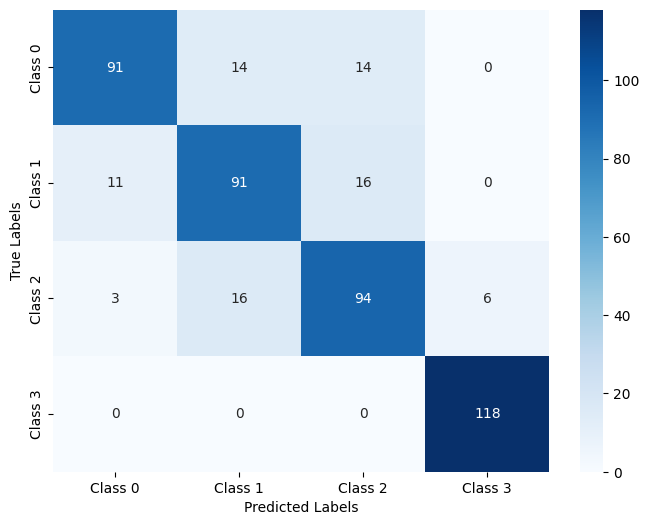

In [48]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
y_pred_prob = model.predict(fetures_resized_mobtest)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_test = np.argmax(target_test, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
report =classification_report(y_test,y_pred)
print(report)
# Plot the confusion matrix as a heatmap
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

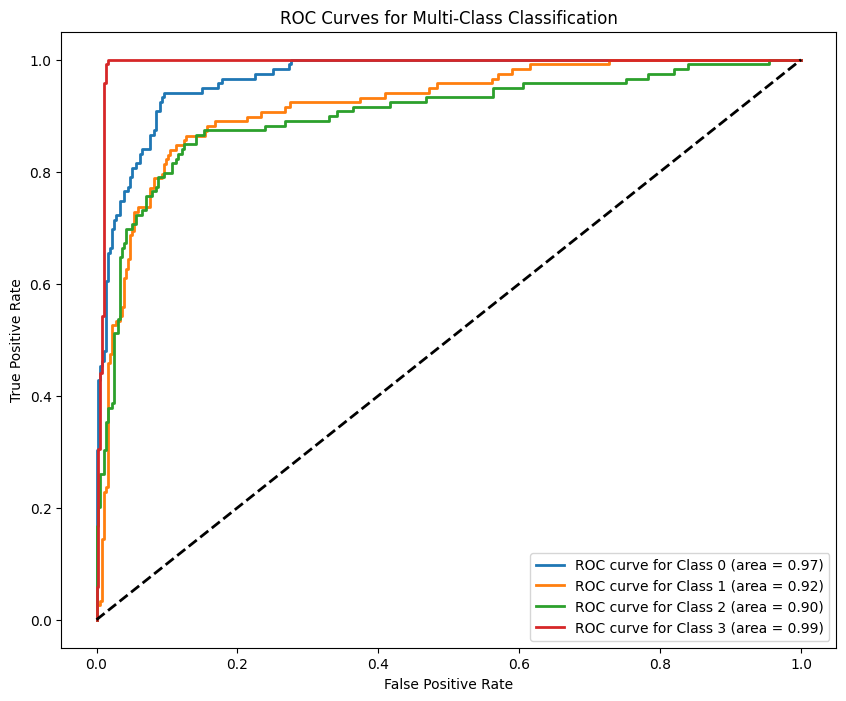

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming 'y_pred_prob' and 'target_test' contain predicted probabilities and true labels in one-hot encoded format

# Convert predicted probabilities to one-hot encoded format
y_test_binary = label_binarize(y_test, classes=np.arange(4))

# Calculate the ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
num_classes = y_test_binary.shape[1]

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve for Class %d (area = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()


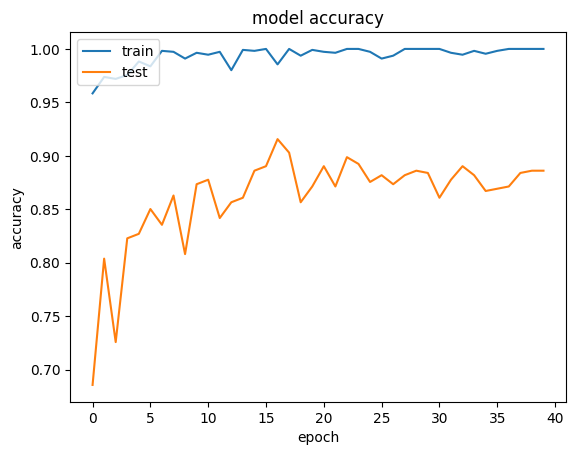

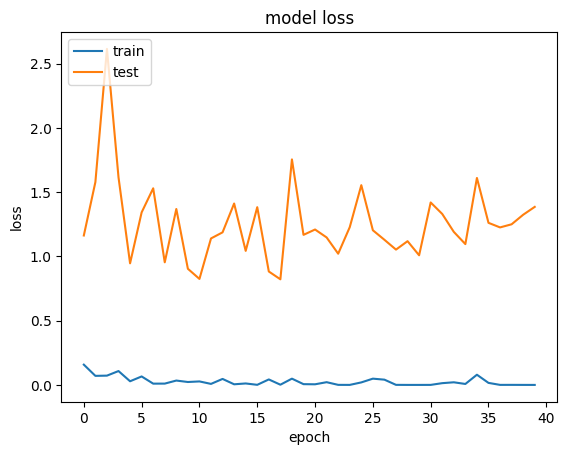

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(features_test, target_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


15/15 [==============================] - 0s 21ms/step - loss: 1.3859 - accuracy: 0.8861
Test loss: 1.385862946510315
Test accuracy: 0.8860759735107422


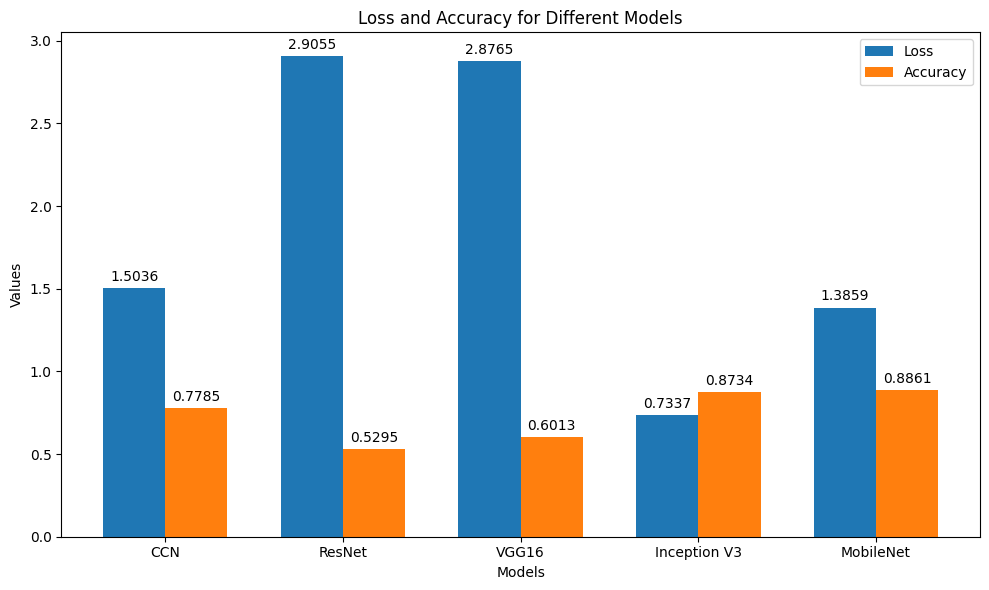

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Data for different models
models = ['CCN', 'ResNet', 'VGG16', 'Inception V3', 'MobileNet']
loss_values = [1.5036, 2.9055, 2.8765, 0.7337, 1.3859]
accuracy_values = [0.7785, 0.5295, 0.6013, 0.8734, 0.8861]

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(models))
bar_width = 0.35

rects1 = ax.bar(index, loss_values, bar_width, label='Loss')
rects2 = ax.bar(index + bar_width, accuracy_values, bar_width, label='Accuracy')

ax.set_xlabel('Models')
ax.set_ylabel('Values')
ax.set_title('Loss and Accuracy for Different Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Annotate the values on top of the bars
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()
